In [3]:
import pandas as pd


base = pd.read_csv('base.csv')
comparing = pd.read_csv('comparing.csv')

In [51]:
base.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,0.0,0.0,13.0,10.0,9.0,5.0,15.0,10.0,5.0,8.0,14.0,14.0,3.0,11.0,7.0,7.0
1,2,8.0,5.0,7.0,6.0,6.0,9.0,13.0,1.0,6.0,1.0,1.0,2.0,7.0,12.0,16.0,15.0
2,6,10.0,6.0,5.0,8.0,2.0,0.0,6.0,11.0,10.0,11.0,8.0,11.0,6.0,1.0,6.0,13.0
3,14,11.0,9.0,16.0,9.0,0.0,2.0,16.0,0.0,2.0,9.0,10.0,1.0,16.0,0.0,5.0,6.0
4,10,14.0,14.0,15.0,1.0,10.0,7.0,1.0,14.0,0.0,0.0,9.0,0.0,5.0,2.0,13.0,5.0
5,8,6.0,12.0,6.0,5.0,15.0,13.0,3.0,9.0,8.0,5.0,12.0,16.0,15.0,8.0,3.0,1.0
6,9,7.0,16.0,4.0,11.0,7.0,1.0,5.0,5.0,11.0,6.0,0.0,8.0,4.0,10.0,1.0,3.0
7,5,9.0,1.0,1.0,13.0,16.0,15.0,0.0,4.0,1.0,14.0,5.0,7.0,1.0,9.0,2.0,2.0
8,11,12.0,11.0,10.0,16.0,8.0,16.0,10.0,6.0,4.0,4.0,2.0,15.0,0.0,16.0,8.0,8.0
9,7,16.0,8.0,11.0,3.0,13.0,10.0,11.0,16.0,14.0,7.0,4.0,5.0,10.0,5.0,10.0,10.0


In [50]:
comparing.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,0.0,5.0,13.0,6.0,9.0,0.0,1.0,10.0,5.0,0.0,14.0,14.0,3.0,11.0,7.0,7.0
1,6,11.0,14.0,16.0,10.0,6.0,5.0,15.0,5.0,6.0,5.0,1.0,6.0,7.0,1.0,5.0,2.0
2,10,14.0,6.0,5.0,5.0,2.0,1.0,6.0,11.0,2.0,6.0,2.0,2.0,6.0,2.0,8.0,14.0
3,2,6.0,0.0,10.0,1.0,10.0,2.0,14.0,1.0,10.0,1.0,7.0,5.0,16.0,12.0,11.0,15.0
4,5,7.0,1.0,7.0,0.0,14.0,9.0,11.0,9.0,8.0,8.0,5.0,16.0,5.0,7.0,9.0,6.0
5,14,10.0,11.0,4.0,15.0,0.0,4.0,0.0,15.0,11.0,4.0,8.0,11.0,4.0,5.0,6.0,5.0
6,7,2.0,9.0,15.0,9.0,1.0,7.0,5.0,0.0,7.0,9.0,10.0,7.0,10.0,0.0,4.0,12.0
7,11,5.0,7.0,11.0,7.0,11.0,10.0,2.0,14.0,14.0,11.0,0.0,9.0,15.0,6.0,0.0,13.0
8,4,8.0,16.0,9.0,11.0,8.0,14.0,16.0,4.0,15.0,14.0,6.0,15.0,14.0,9.0,16.0,3.0
9,8,4.0,12.0,6.0,8.0,4.0,11.0,9.0,2.0,1.0,7.0,9.0,1.0,11.0,16.0,10.0,1.0


In [192]:
def calculate_mrr(base, comparison, k):
    mrr = 0


    for column in base.columns:
        first_k_base = list(map(int, base.loc[:, column].values.tolist()[:k]))
        first_k_comparison = list(map(int, comparison.loc[:, column].values.tolist()[:k]))

        relevant_list = list(set(first_k_base) & set(first_k_comparison))

        for i in range(len(first_k_comparison)):
            if first_k_comparison[i] in relevant_list:
                mrr += 1 / (i + 1)
                print(column, 1 / (i + 1))
                break
    print(mrr)
    mrr /= len(base.columns)
    return mrr

In [193]:
calculate_mrr(base, comparing, 1)

0 1.0
1 1.0
3 1.0
5 1.0
8 1.0
9 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
12.0


0.7058823529411765

/var/folders/wy/xyqwny610cb9ft3dhglx4jyc0000gn/T/ipykernel_92835/3171809501.py:11: RuntimeWarning: divide by zero encountered in divide
  log_division = 1 / np.log2(i_values)


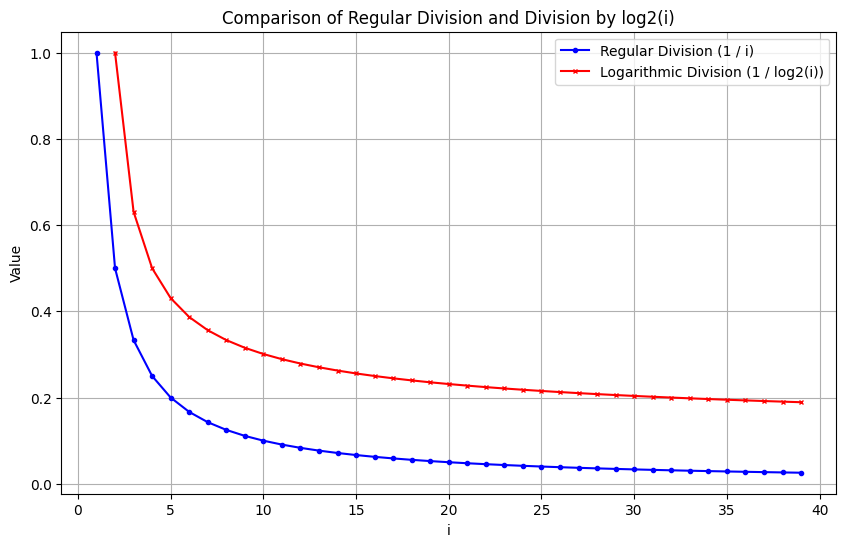

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range for i (1 to 40)
i_values = np.arange(1, 40)

# Calculate the division by i (regular division)
regular_division = 1 / i_values

# Calculate the division by log2(i)
log_division = 1 / np.log2(i_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(i_values, regular_division, label="Regular Division (1 / i)", color='blue', marker='o', markersize=3)
plt.plot(i_values, log_division, label="Logarithmic Division (1 / log2(i))", color='red', marker='x', markersize=3)

# Add labels and title
plt.xlabel("i")
plt.ylabel("Value")
plt.title("Comparison of Regular Division and Division by log2(i)")
plt.legend()
plt.grid(True)
plt.show()

In [35]:
print(regular_division[:4])
print(regular_diff[:4])

[1.         0.5        0.33333333 0.25      ]
[-0.5        -0.16666667 -0.08333333 -0.05      ]


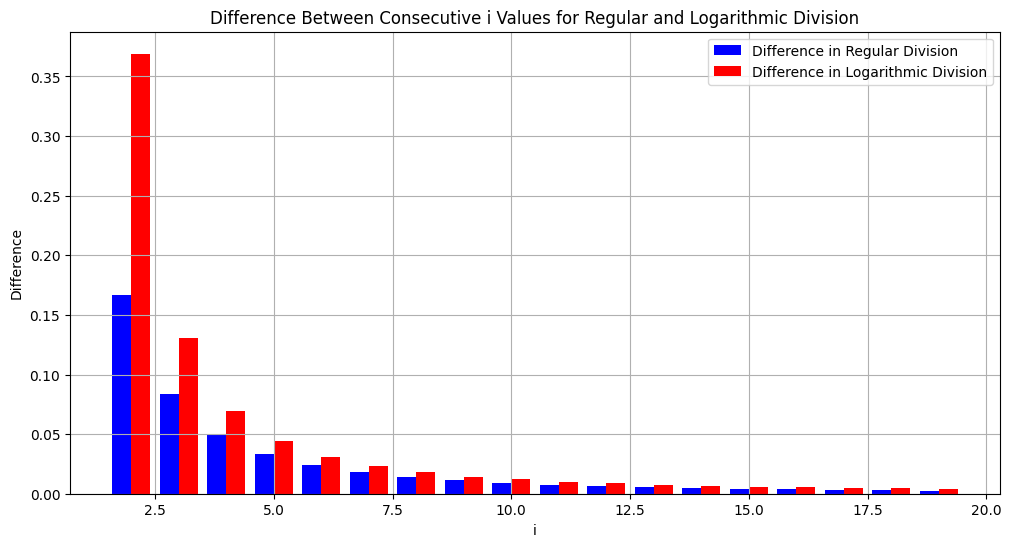

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range for i (1 to 100)
i_values = np.arange(2, 21)

# Calculate the division by i (regular division)
regular_division = 1 / i_values

# Calculate the division by log2(i)
log_division = 1 / np.log2(i_values)

# Calculate the differences between consecutive i values for both methods
regular_diff = np.diff(regular_division)[:20] * -1
log_diff = np.diff(log_division)[:20] * -1

# Define the new range for i (since np.diff reduces the size by 1)
i_diff_values = np.arange(2, 20)

# Plot the differences as a Bar Plot
plt.figure(figsize=(12, 6))
plt.bar(i_diff_values - 0.2, regular_diff, width=0.4, label="Difference in Regular Division", color='blue')
plt.bar(i_diff_values + 0.2, log_diff, width=0.4, label="Difference in Logarithmic Division", color='red')

# Add labels and title
plt.xlabel("i")
plt.ylabel("Difference")
plt.title("Difference Between Consecutive i Values for Regular and Logarithmic Division")
plt.legend()
plt.grid(True)
plt.show()

In [182]:
import numpy as np

def calculate_ndcg(standard_similarities, comparing_data, k):
    standard_data = standard_similarities.copy()
    

    dcg = 0
    idcg = 0

    for i in range(len(standard_similarities.columns)):
        # print(i)
        # Get top-k standard and base rankings
        standard_ranking = list(map(int, standard_similarities.iloc[:, i].values.tolist()[:k]))
        comparing_ranking = list(map(int, comparing_data.iloc[:, i].values.tolist()[:k]))

        
        # DCG calculation: Gain comes from predicted ranking
        for rank, idx in enumerate(comparing_ranking):
            if idx in standard_ranking:
                # print(f'1 / log2({rank + 1} + 1)')
                dcg += 1 / np.log2(rank + 2)

        # IDCG calculation: Perfect ranking (ideal)
        for ideal_rank in range(min(k, len(standard_ranking))):
            idcg += 1 / np.log2(ideal_rank + 2)

    return dcg / idcg if idcg > 0 else 0

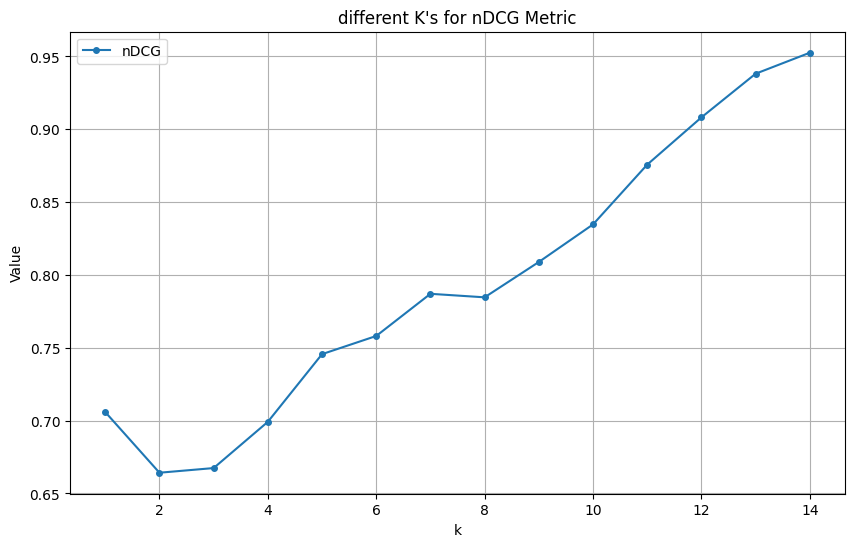

In [169]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range for k 
# k_values = [1, 3, 5, 10, 15]
k_values = np.arange(1, 15, 1)


datas = {'nDCG': (calculate_ndcg, [], '.')}


# Plot the results
plt.figure(figsize=(10, 6))

for data in datas.keys():
    for k in k_values:
        datas[data][1].append(datas[data][0](base, comparing, k))

    plt.plot(k_values, datas[data][1], label=data, marker=datas[data][2], markersize=8)


# Add labels and title
plt.xlabel("k")
plt.ylabel("Value")
plt.title("different K's for nDCG Metric")
plt.legend()
plt.grid(True)
plt.show()

In [115]:
def calcualte_precision(base, comparison, k):
    precision = 0

    for column in base.columns:
        first_k_base = list(map(int, base.loc[:, column].values.tolist()[:k]))
        first_k_comparison = list(map(int, comparison.loc[:, column].values.tolist()[:k]))

        relevant_numbers = len(list(set(first_k_base) & set(first_k_comparison)))

        # print(column, relevant_numbers / k)

        precision += relevant_numbers / k

    return precision / len(base.columns)

In [106]:
calcualte_precision(base, comparing, 5)

0 0.8
1 0.6
2 0.8
3 0.8
4 0.6
5 0.8
6 0.8
7 0.6
8 0.6
9 0.8
10 0.6
11 0.4
12 0.4
13 1.0
14 0.8
15 0.4
16 0.6


0.6705882352941177

In [125]:
def calcualte_recall(base, comparison, k):
    recall = 0

    for column in base.columns:
        first_k_base = list(map(int, base.loc[:, column].values.tolist()[:k]))
        first_k_comparison = list(map(int, comparison.loc[:, column].values.tolist()[:k]))

        relevant_numbers = len(list(set(first_k_base) & set(first_k_comparison)))

        # print(column, relevant_numbers / 15)

        recall += relevant_numbers / 15

    return recall / len(base.columns)

In [108]:
calcualte_recall(base, comparing, 5)

0 0.26666666666666666
1 0.2
2 0.26666666666666666
3 0.26666666666666666
4 0.2
5 0.26666666666666666
6 0.26666666666666666
7 0.2
8 0.2
9 0.26666666666666666
10 0.2
11 0.13333333333333333
12 0.13333333333333333
13 0.3333333333333333
14 0.26666666666666666
15 0.13333333333333333
16 0.2


0.2235294117647059

In [117]:
def calculate_f1(base, comparison, k):
    recall_at_k = calcualte_recall(base, comparison, k)
    precision_at_k = calcualte_precision(base, comparison, k)

    return 2 * ((precision_at_k * recall_at_k) / (precision_at_k + recall_at_k))

In [112]:
calculate_f1(base.iloc[:, [2]], comparing.iloc[:, [2]], 5)

2 0.26666666666666666
2 0.8


0.4

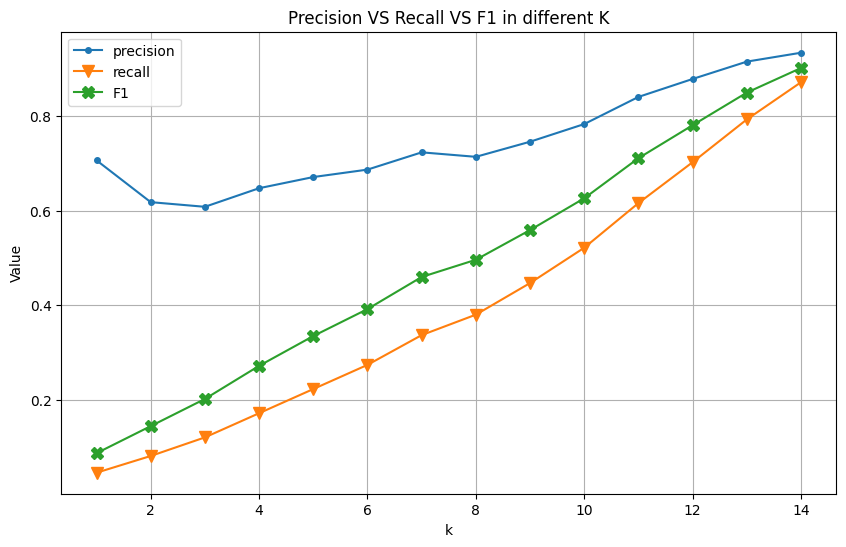

In [124]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range for k 
# k_values = [1, 3, 5, 10, 15]
k_values = np.arange(1, 15, 1)


datas = {'precision': (calcualte_precision, [], '.'),
         'recall': (calcualte_recall, [], 'v'),
         'F1': (calculate_f1, [], 'X')
        }


# Plot the results
plt.figure(figsize=(10, 6))

for data in datas.keys():
    for k in k_values:
        datas[data][1].append(datas[data][0](base, comparing, k))

    plt.plot(k_values, datas[data][1], label=data, marker=datas[data][2], markersize=8)


# Add labels and title
plt.xlabel("k")
plt.ylabel("Value")
plt.title("Precision VS Recall VS F1 in different K")
plt.legend()
plt.grid(True)
plt.show()

In [167]:
def calculate_map(base, comparison, k):
    map_ = 0

    for column in base.columns:
        ap = 0
        
        first_k_base = list(map(int, base.loc[:, column].values.tolist()[:k]))
        first_k_comparison = list(map(int, comparison.loc[:, column].values.tolist()[:k]))

        relevant_list = list(set(first_k_base) & set(first_k_comparison))

        for i in range(k):
            if first_k_comparison[i] not in relevant_list:
                continue

            ap += calcualte_precision(base.loc[:, [column]],  comparison.loc[:, [column]], i + 1)

        if relevant_list:
            map_ += ap / len(relevant_list)
        

            # print(f"ap@{k}_{column} = {ap / len(relevant_list)}")

    return map_ / len(base.columns)

    

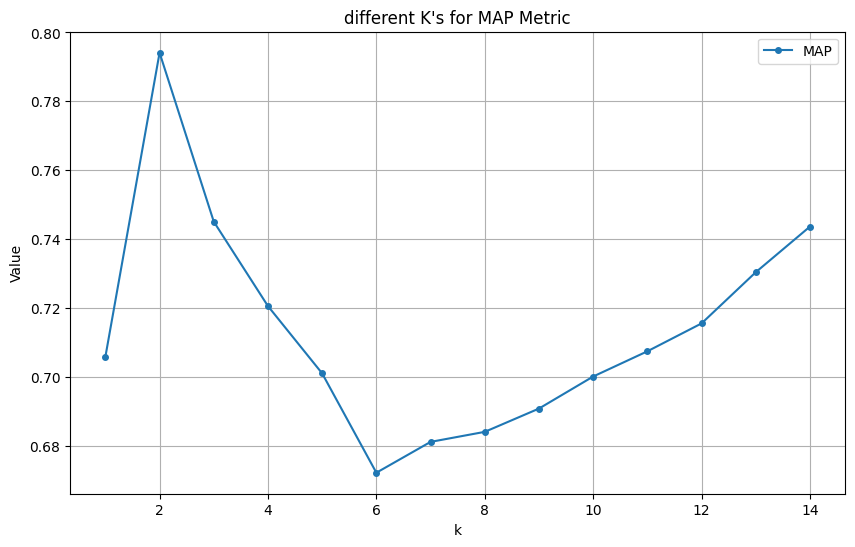

In [168]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range for k 
# k_values = [1, 3, 5, 10, 15]
k_values = np.arange(1, 15, 1)


datas = {'MAP': (calculate_map, [], '.')}


# Plot the results
plt.figure(figsize=(10, 6))

for data in datas.keys():
    for k in k_values:
        datas[data][1].append(datas[data][0](base, comparing, k))

    plt.plot(k_values, datas[data][1], label=data, marker=datas[data][2], markersize=8)


# Add labels and title
plt.xlabel("k")
plt.ylabel("Value")
plt.title("different K's for MAP Metric")
plt.legend()
plt.grid(True)
plt.show()